In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Emotion Detection from Text.zip',
 'text_emotion.csv',
 'text_emotion.csv.zip',
 'tweet_emotions.csv',
 'Untitled.ipynb']

In [4]:
df = pd.read_csv('tweet_emotions.csv', delimiter=',')
df.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [5]:
df.sentiment.unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [6]:
df.sentiment.nunique()

13

## There Are 13 classes

In [8]:
def basic_eda(df, row_limit=5, list_elements_limit=10):
    ### rows and columns
    print('Info : There are {} columns in the dataset'.format(df.shape[1]))
    print('Info : There are {} rows in the dataset'.format(df.shape[0]))
    
    print("==================================================")
    
    ## data types
    print("\nData type information of different columns")
    dtypes_df = pd.DataFrame(df.dtypes).reset_index().rename(columns={0:'dtype', 'index':'column_name'})
    cat_df = dtypes_df[dtypes_df['dtype']=='object']
    num_df = dtypes_df[dtypes_df['dtype']!='object']
    print('Info : There are {} categorical columns'.format(len(cat_df)))
    print('Info : There are {} numerical columns'.format(len(dtypes_df)-len(cat_df)))
    
    if list_elements_limit >= len(cat_df):
        print("Categorical columns : ", list(cat_df['column_name']))
    else:
        print("Categorical columns : ", list(cat_df['column_name'])[:list_elements_limit])
        
    if list_elements_limit >= len(num_df):
        print("Numerical columns : ", list(num_df['column_name']))
    else:
        print("Numerical columns : ", list(num_df['column_name'])[:list_elements_limit])
    
    #dtypes_df['dtype'].value_counts().plot.bar()
    display(dtypes_df.head(row_limit))
    
    print("==================================================")
    print("\nDescription of numerical variables")
    
    #### Describibg numerical columns
    desc_df_num = df[list(num_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_num.head(row_limit))
    
    print("==================================================")
    print("\nDescription of categorical variables")
    
    desc_df_cat = df[list(cat_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_cat.head(row_limit))
    
    return

In [9]:
basic_eda(df)

Info : There are 3 columns in the dataset
Info : There are 40000 rows in the dataset

Data type information of different columns
Info : There are 2 categorical columns
Info : There are 1 numerical columns
Categorical columns :  ['sentiment', 'content']
Numerical columns :  ['tweet_id']


,column_name,dtype
0,tweet_id,int64
1,sentiment,object
2,content,object



Description of numerical variables


,column_name,count,mean,std,min,25%,50%,75%,max
0,tweet_id,40000.0,1.845184e+09,1.188579e+08,1.693956e+09,1.751431e+09,1.855443e+09,1.962781e+09,1.966441e+09



Description of categorical variables


,column_name,count,unique,top,freq
0,sentiment,40000,13,neutral,8638
1,content,40000,39827,I just received a mothers day card from my lov...,14


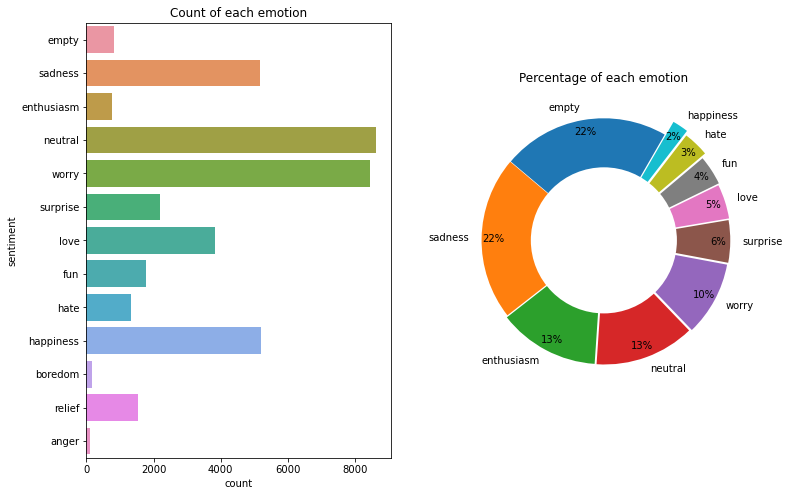

In [10]:
col = 'sentiment'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:10]
labels = list(df[col].dropna().unique())[:10]
sizes = df[col].value_counts()[:10]
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

### We can see that there are 13 different classes and some of the are having very few examples. (i.e. Anger, Boredom, Empty etc...). This is a very imbalanced dataset and it will not allow the model to converge. We'll reduce the number of classes.

In [11]:
df['sentiment'] = df['sentiment'].apply(lambda x : x if x in ['happiness', 'sadness', 'worry', 'neutral', 'love'] else "other") 

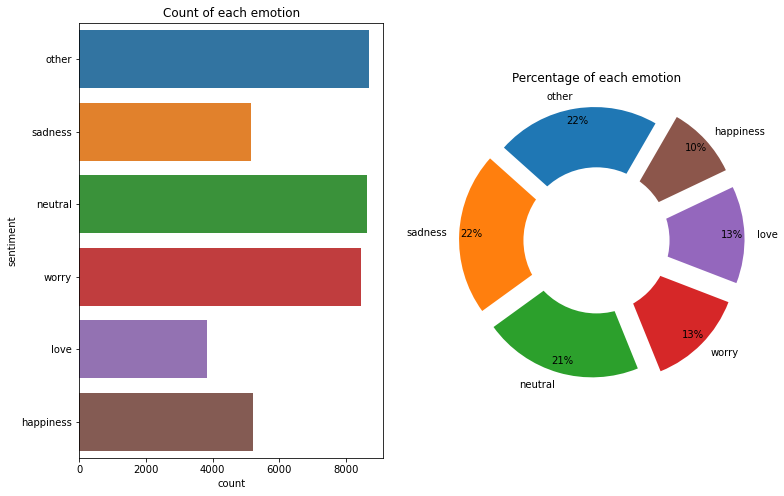

In [12]:
col = 'sentiment'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:10]
labels = list(df[col].dropna().unique())[:10]
sizes = df[col].value_counts()[:10]
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

In [13]:
df['char_length'] = df['content'].apply(lambda x : len(x))
df['token_length'] = df['content'].apply(lambda x : len(x.split(" ")))

### Distribution of character length and token length overall

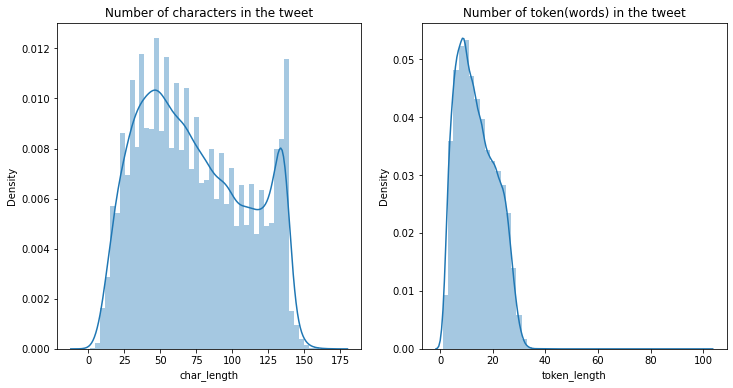

In [14]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(df['char_length'], ax=ax1)
sns.distplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

### Distribution of character length sentiment-wise [Top 5 sentiments]

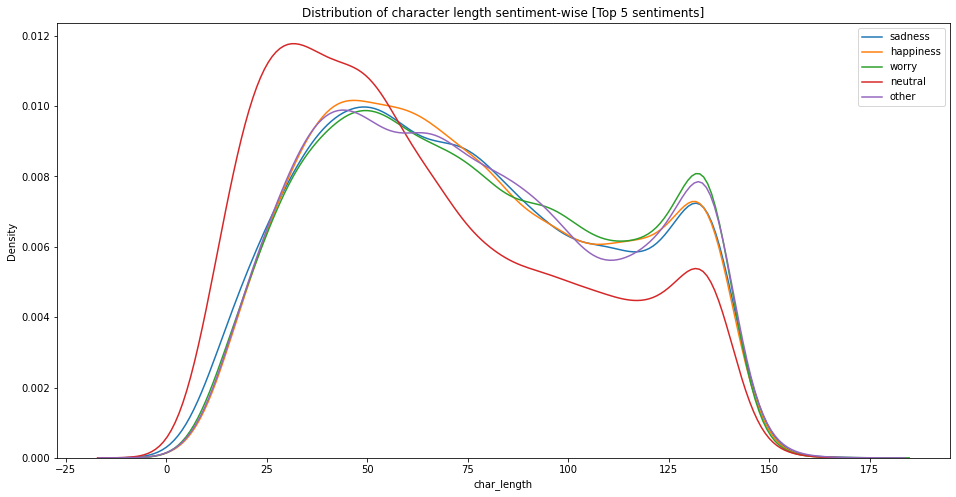

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
for sentiment in df['sentiment'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(df[df['sentiment']==sentiment]['char_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of character length sentiment-wise [Top 5 sentiments]")
plt.show()

### Distribution of token length sentiment-wise [Top 5 sentiments]

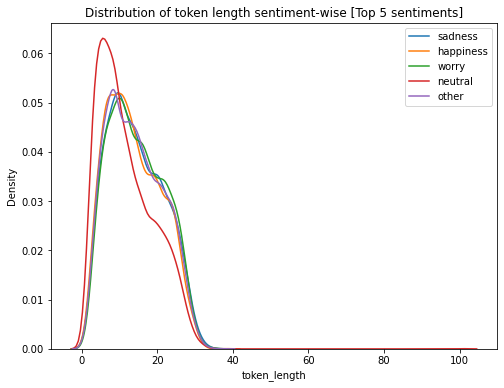

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
for sentiment in df['sentiment'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(df[df['sentiment']==sentiment]['token_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of token length sentiment-wise [Top 5 sentiments]")
plt.show()

### Let's look at the most common character and token length

In [17]:
avg_df = df.groupby('sentiment').agg({'char_length':'mean', 'token_length':'mean'})

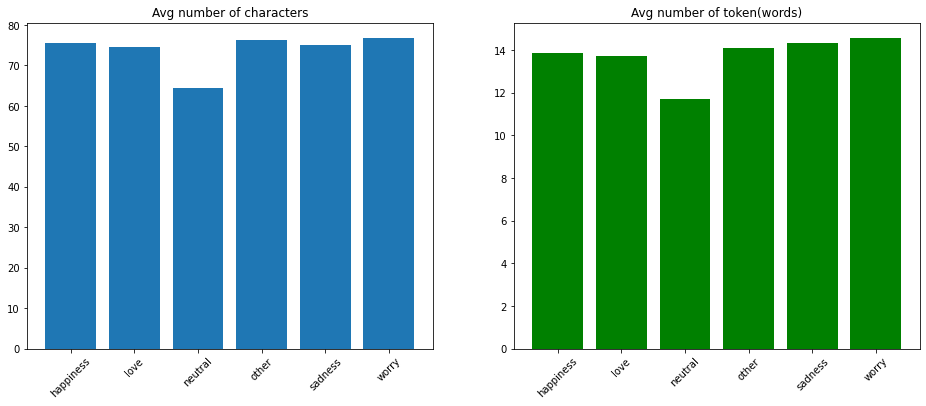

In [18]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.bar(avg_df.index, avg_df['char_length'])
ax2.bar(avg_df.index, avg_df['token_length'], color='green')
ax1.set_title('Avg number of characters')
ax2.set_title('Avg number of token(words)')
ax1.set_xticklabels(avg_df.index, rotation = 45)
ax2.set_xticklabels(avg_df.index, rotation = 45)
plt.show()

### Observations

- There are 13 different emotions.
- "Neurtal" and "Worry" are the most frequent emotions in the dataset.
- Most of the tweets have around 45 characters.
- The most frequent token length is around 10.
- people having "empty" and "neutral" emotion write smaller tweet.

In [19]:
!pip install inflect
!pip install contractions
!pip install bs4

  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp36-cp36m-win_amd64.whl size=43231 sha256=4469d612acf1368257cfcc4e91dcefa860268dc40dd9d483aefa9c847595ae7a
  Stored in directory: C:\Users\Ahmad Abd Elhameed\AppData\Local\pip\Cache\wheels\3a\03\34\77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
  Created wheel for bs4: filename=bs4-0.0.1-cp36-none-any.whl size=1273 sha256=fb06b354bc9202b3ff9cc944433ed6ca21826759cc07d1f886dee3c349570c49
  Stored in directory: C:\Users\Ahmad Abd Elhameed\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [20]:
# Data preparation and text-preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import nltk
import inflect
import contractions
from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [21]:
#### text preprocessing

def text_preprocessing_platform(df, text_col, remove_stopwords=True):
    
    ## Define functions for individual steps
    # First function is used to denoise text
    def denoise_text(text):
        # Strip html if any. For ex. removing <html>, <p> tags
        soup = BeautifulSoup(text, "html.parser")
        text = soup.get_text()
        # Replace contractions in the text. For ex. didn't -> did not
        text = contractions.fix(text)
        return text
    
    ## Next step is text-normalization
    
    # Text normalization includes many steps.
    
    # Each function below serves a step.
    
    
    def remove_non_ascii(words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words
    
    
    def to_lowercase(words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words
    
    
    def remove_punctuation(words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words
    
    
    def replace_numbers(words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words
    
    
    def remove_stopwords(words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word)
        return new_words
    
    
    def stem_words(words):
        """Stem words in list of tokenized words"""
        stemmer = LancasterStemmer()
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems
    
    
    def lemmatize_verbs(words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas
    
    
    ### A wrap-up function for normalization
    def normalize_text(words, remove_stopwords):
        words = remove_non_ascii(words)
        words = to_lowercase(words)
        words = remove_punctuation(words)
        words = replace_numbers(words)
        if remove_stopwords:
            words = remove_stopwords(words)
        #words = stem_words(words)
        words = lemmatize_verbs(words)
        return words
    
    # All above functions work on word tokens we need a tokenizer
    
    # Tokenize tweet into words
    def tokenize(text):
        return nltk.word_tokenize(text)
    
    
    # A overall wrap-up function
    def text_prepare(text):
        text = denoise_text(text)
        text = ' '.join([x for x in normalize_text(tokenize(text), remove_stopwords)])
        return text
    
    # run every-step
    df[text_col] = [text_prepare(x) for x in df[text_col]]
    
    
    # return processed df
    return df

In [22]:
print("Before Text Preprocessing")
display(df.head()[['content']])
processed_df = text_preprocessing_platform(df, 'content', remove_stopwords=False)
print("After Text Preprocessing")
display(processed_df.head()[['content']])

Before Text Preprocessing


,content
0,@tiffanylue i know i was listenin to bad habi...
1,Layin n bed with a headache ughhhh...waitin o...
2,Funeral ceremony...gloomy friday...
3,wants to hang out with friends SOON!
4,@dannycastillo We want to trade with someone w...


After Text Preprocessing


,content
0,tiffanylue know listenin bad habit earlier sta...
1,layin n bed headache ughhhh waitin call
2,funeral ceremony gloomy friday
3,want hang friends soon
4,dannycastillo want trade someone houston ticke...


In [23]:
processed_df.shape

(40000, 5)

In [24]:
df.shape

(40000, 5)

In [25]:
processed_df.sentiment.unique()

array(['other', 'sadness', 'neutral', 'worry', 'love', 'happiness'],
      dtype=object)

In [26]:
def label_encode(data,label):
    labels=data[label].map(
    {
        "other":0,
        "sadness":1,
        "neutral":2,
        "worry":3,
        "love":4,
        "happiness":5
    }
    )
    return labels

In [27]:
df1 = processed_df

In [28]:
df1["Label"]=label_encode(processed_df,"sentiment")

In [29]:
df.head()

,tweet_id,sentiment,content,char_length,token_length,Label
0,1956967341,other,tiffanylue know listenin bad habit earlier sta...,92,19,0
1,1956967666,sadness,layin n bed headache ughhhh waitin call,60,11,1
2,1956967696,sadness,funeral ceremony gloomy friday,35,3,1
3,1956967789,other,want hang friends soon,36,7,0
4,1956968416,neutral,dannycastillo want trade someone houston ticke...,86,15,2


In [30]:
from sklearn.model_selection import train_test_split

In [37]:
df1 = df1[(df1.sentiment.isin(["sadness", "neutral","worry","love","happiness"]))]

In [54]:
df1 = df1.reset_index()

In [55]:
df1.shape

(31313, 7)

In [56]:
df1.head()

,index,tweet_id,sentiment,content,char_length,token_length,Label
0,1,1956967666,sadness,layin n bed headache ughhhh waitin call,60,11,1
1,2,1956967696,sadness,funeral ceremony gloomy friday,35,3,1
2,4,1956968416,neutral,dannycastillo want trade someone houston ticke...,86,15,2
3,5,1956968477,worry,repinging ghostridah14 go prom bc bf like friends,84,15,3
4,6,1956968487,sadness,sleep think old friend want marry damn want tw...,132,26,1


In [57]:
df1.drop(["index"],axis=1,inplace=True)

In [58]:
df1.head()

,tweet_id,sentiment,content,char_length,token_length,Label
0,1956967666,sadness,layin n bed headache ughhhh waitin call,60,11,1
1,1956967696,sadness,funeral ceremony gloomy friday,35,3,1
2,1956968416,neutral,dannycastillo want trade someone houston ticke...,86,15,2
3,1956968477,worry,repinging ghostridah14 go prom bc bf like friends,84,15,3
4,1956968487,sadness,sleep think old friend want marry damn want tw...,132,26,1


In [52]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()

In [62]:
df1.Label.nunique()

5

In [59]:
X = onehotencoder.fit_transform(df1.Label.values.reshape(-1,1)).toarray()

In [63]:
one_hot = pd.DataFrame(X, columns = [str(int(i)) for i in range(df1["Label"].nunique())]) 
df2 = pd.concat([df1, one_hot], axis=1)

In [65]:
df2.head()

,tweet_id,sentiment,content,char_length,token_length,Label,0,1,2,3,4
0,1956967666,sadness,layin n bed headache ughhhh waitin call,60,11,1,1.0,0.0,0.0,0.0,0.0
1,1956967696,sadness,funeral ceremony gloomy friday,35,3,1,1.0,0.0,0.0,0.0,0.0
2,1956968416,neutral,dannycastillo want trade someone houston ticke...,86,15,2,0.0,1.0,0.0,0.0,0.0
3,1956968477,worry,repinging ghostridah14 go prom bc bf like friends,84,15,3,0.0,0.0,1.0,0.0,0.0
4,1956968487,sadness,sleep think old friend want marry damn want tw...,132,26,1,1.0,0.0,0.0,0.0,0.0


In [66]:
df2.rename(columns={'0': 'sadness', '1': 'neutral',"2":"worry","3":"love","4":"happiness"}, inplace=True)

In [67]:
df2.head()

,tweet_id,sentiment,content,char_length,token_length,Label,sadness,neutral,worry,love,happiness
0,1956967666,sadness,layin n bed headache ughhhh waitin call,60,11,1,1.0,0.0,0.0,0.0,0.0
1,1956967696,sadness,funeral ceremony gloomy friday,35,3,1,1.0,0.0,0.0,0.0,0.0
2,1956968416,neutral,dannycastillo want trade someone houston ticke...,86,15,2,0.0,1.0,0.0,0.0,0.0
3,1956968477,worry,repinging ghostridah14 go prom bc bf like friends,84,15,3,0.0,0.0,1.0,0.0,0.0
4,1956968487,sadness,sleep think old friend want marry damn want tw...,132,26,1,1.0,0.0,0.0,0.0,0.0


In [70]:
X = df2["content"]
y = df2[['sadness','neutral',"worry","love","happiness"]]

In [71]:
X.head()

0              layin n bed headache ughhhh waitin call
1                       funeral ceremony gloomy friday
2    dannycastillo want trade someone houston ticke...
3    repinging ghostridah14 go prom bc bf like friends
4    sleep think old friend want marry damn want tw...
Name: content, dtype: object

In [72]:
y.head()

,sadness,neutral,worry,love,happiness
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train.shape

(25050,)

In [75]:
X_test.shape

(6263,)

In [77]:
# import libraries
from nltk.tokenize import word_tokenize , sent_tokenize
from sklearn.pipeline import Pipeline , FeatureUnion
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier ,BaggingClassifier ,ExtraTreesClassifier
from sklearn.model_selection import train_test_split,  GridSearchCV 
from sklearn.metrics import classification_report ,confusion_matrix , accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
import pickle

[nltk_data] Downloading package punkt to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [78]:
def tokenize(text):
    text_token = word_tokenize(text)
    return text_token

### A machine learning pipeline
This machine pipeline should take in the comment column as input and output classification results on the other 5 categories in the dataset.

## Random Forest

In [79]:
pipeline = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ("clf",MultiOutputClassifier(RandomForestClassifier()))])

In [80]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x000001D9076030D0>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])

In [81]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

In [82]:
# predict on test data
y_pred = pipeline.predict(X_test)

In [83]:
total_scores = []
def accuracy_report(y_test,y_pred):
    i = 0
    for feat in y_test:
        print("Feature {}: {}".format(i+1,feat))
        print(classification_report(y_test[feat],y_pred[:,i]))
        accuracy = accuracy_score(y_test.iloc[:,i],y_pred[:,i])
        total_scores.append(accuracy)
        i+=1
    print("Total Accuracy : {:.4f}".format(np.mean(total_scores)))

In [84]:
accuracy_report(y_test,y_pred)

Feature 1: sadness
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      5156
         1.0       0.43      0.08      0.13      1107

    accuracy                           0.82      6263
   macro avg       0.63      0.53      0.52      6263
weighted avg       0.76      0.82      0.76      6263

Feature 2: neutral
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.84      4580
         1.0       0.53      0.26      0.35      1683

    accuracy                           0.74      6263
   macro avg       0.65      0.59      0.59      6263
weighted avg       0.70      0.74      0.70      6263

Feature 3: worry
              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84      4633
         1.0       0.45      0.13      0.20      1630

    accuracy                           0.73      6263
   macro avg       0.60      0.54      0.52      6263
weighted avg       

## AdaBoost

In [85]:
pipeline_adaboost = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(AdaBoostClassifier()))])

In [86]:
pipeline_adaboost.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x000001D9076030D0>)),
                ('tfidf', TfidfTransformer()),
                ('clf', MultiOutputClassifier(estimator=AdaBoostClassifier()))])

In [87]:
# predict on test data
y_pred = pipeline_adaboost.predict(X_test)

In [88]:
accuracy_report(y_test,y_pred)

Feature 1: sadness
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      5156
         1.0       0.56      0.10      0.17      1107

    accuracy                           0.83      6263
   macro avg       0.70      0.54      0.54      6263
weighted avg       0.79      0.83      0.77      6263

Feature 2: neutral
              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84      4580
         1.0       0.50      0.05      0.09      1683

    accuracy                           0.73      6263
   macro avg       0.62      0.52      0.47      6263
weighted avg       0.67      0.73      0.64      6263

Feature 3: worry
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.84      4633
         1.0       0.52      0.16      0.25      1630

    accuracy                           0.74      6263
   macro avg       0.64      0.55      0.55      6263
weighted avg       

## Boosting

In [90]:
## Improve the model
pipeline_boosting = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(GradientBoostingClassifier()))])

In [91]:
pipeline_boosting.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x000001D9076030D0>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=GradientBoostingClassifier()))])

In [92]:
# predict on test data
y_pred = pipeline_boosting.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: sadness
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90      5156
         1.0       0.62      0.05      0.09      1107

    accuracy                           0.83      6263
   macro avg       0.73      0.52      0.50      6263
weighted avg       0.79      0.83      0.76      6263

Feature 2: neutral
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84      4580
         1.0       0.33      0.00      0.00      1683

    accuracy                           0.73      6263
   macro avg       0.53      0.50      0.42      6263
weighted avg       0.62      0.73      0.62      6263

Feature 3: worry
              precision    recall  f1-score   support

         0.0       0.75      0.99      0.85      4633
         1.0       0.59      0.05      0.09      1630

    accuracy                           0.74      6263
   macro avg       0.67      0.52      0.47      6263
weighted avg       

## Bagging

In [94]:
pipeline_bagging = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(BaggingClassifier()))])
pipeline_bagging.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_bagging.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: sadness
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89      5156
         1.0       0.41      0.14      0.21      1107

    accuracy                           0.81      6263
   macro avg       0.62      0.55      0.55      6263
weighted avg       0.76      0.81      0.77      6263

Feature 2: neutral
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83      4580
         1.0       0.50      0.30      0.38      1683

    accuracy                           0.73      6263
   macro avg       0.64      0.59      0.60      6263
weighted avg       0.70      0.73      0.71      6263

Feature 3: worry
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82      4633
         1.0       0.41      0.21      0.28      1630

    accuracy                           0.71      6263
   macro avg       0.59      0.55      0.55      6263
weighted avg       

## Extra Trees

In [95]:
pipeline_extratrees = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(ExtraTreesClassifier()))])
pipeline_extratrees.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_extratrees.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: sadness
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      5156
         1.0       0.43      0.07      0.12      1107

    accuracy                           0.82      6263
   macro avg       0.63      0.52      0.51      6263
weighted avg       0.76      0.82      0.76      6263

Feature 2: neutral
              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84      4580
         1.0       0.52      0.21      0.30      1683

    accuracy                           0.74      6263
   macro avg       0.64      0.57      0.57      6263
weighted avg       0.70      0.74      0.69      6263

Feature 3: worry
              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84      4633
         1.0       0.43      0.13      0.21      1630

    accuracy                           0.73      6263
   macro avg       0.59      0.54      0.52      6263
weighted avg       

## Decision Tree

In [96]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [97]:
pipeline_DT = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ("clf",MultiOutputClassifier(DecisionTreeClassifier()))])
pipeline_DT.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_DT.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: sadness
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      5156
         1.0       0.30      0.23      0.26      1107

    accuracy                           0.77      6263
   macro avg       0.57      0.56      0.56      6263
weighted avg       0.75      0.77      0.76      6263

Feature 2: neutral
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.79      4580
         1.0       0.38      0.32      0.35      1683

    accuracy                           0.68      6263
   macro avg       0.57      0.56      0.57      6263
weighted avg       0.66      0.68      0.67      6263

Feature 3: worry
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      4633
         1.0       0.36      0.33      0.34      1630

    accuracy                           0.67      6263
   macro avg       0.56      0.56      0.56      6263
weighted avg       

## Naive Bayes

In [98]:
pipeline_NV = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ("clf",MultiOutputClassifier(MultinomialNB()))])
pipeline_NV.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_NV.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: sadness
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      5156
         1.0       0.00      0.00      0.00      1107

    accuracy                           0.82      6263
   macro avg       0.41      0.50      0.45      6263
weighted avg       0.68      0.82      0.74      6263

Feature 2: neutral
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84      4580
         1.0       0.60      0.00      0.01      1683

    accuracy                           0.73      6263
   macro avg       0.67      0.50      0.43      6263
weighted avg       0.70      0.73      0.62      6263

Feature 3: worry
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      4633
         1.0       0.53      0.01      0.02      1630

    accuracy                           0.74      6263
   macro avg       0.64      0.50      0.44      6263
weighted avg       